In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [2]:
file_name = 'acisf15258_000N021_r0031s_lc3.fits'
result = fits.open('usrid_1/'+file_name)
result.info()

Filename: usrid_1/acisf15258_000N021_r0031s_lc3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU    164   102R x 5C   [1D, 1D, 1D, 1D, 1D]   
  2  BKGLIGHTCURVE    1 BinTableHDU    169   102R x 5C   [1D, 1D, 1D, 1D, 1D]   


Resolution = 491.0774547457695 s


(0.0, 40000.0)

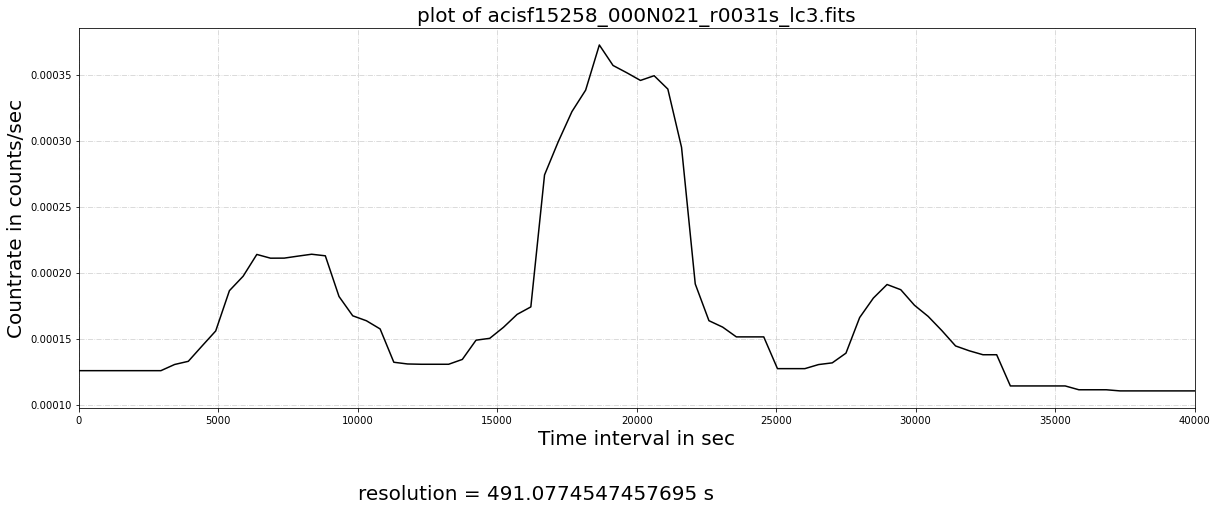

In [3]:
lc = result[1].data #Lightcurve
bg = result[2].data #Background

time = lc['Time']
resolution = time[1]-time[0]
print(f'Resolution = {resolution} s')
lc_count_rate = lc['COUNT_RATE']
lc_count_rate_err = lc['COUNT_RATE_ERR']

dt = time - time[0]

plt.figure(figsize = [20,7], facecolor = 'w')
plt.plot(dt, lc_count_rate, c = 'k')
#plt.scatter(dt, lc_count_rate, c = 'k', zorder = 1)
#plt.errorbar(dt, lc_count_rate, lc_count_rate_err, fmt = 'none', c = 'pink', zorder = 0)
plt.grid(color = 'lightgrey', ls = '-.')
plt.xlabel('Time interval in sec', fontsize = 20)
plt.ylabel('Countrate in counts/sec', fontsize = 20)
plt.title(f'plot of {file_name}', fontsize = 20)
#plt.text(10000,2.8e-5, s = f'resolution = {resolution} s', fontsize = 20)
plt.xlim(0,40000)

Interval =  5510.980325606134


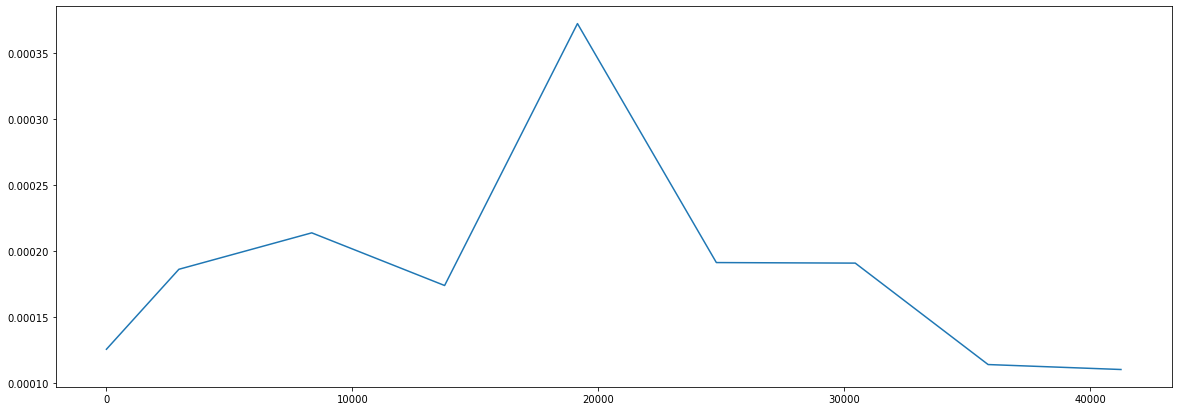

In [4]:
#making time bins
num_bin = 9
t_max = np.max(dt)
t_min = np.min(dt)
interval = (t_max - t_min)/num_bin
print('Interval = ',interval)
t_bins = np.zeros(num_bin)
count_bin = np.zeros(num_bin)
sum = 0
j = 0
for i in range(num_bin):
    t_sum = 0
    count_array = []
    count = 0
    while dt[j] <= t_min + i*interval:
        t_sum += dt[j]
        count_array.append(lc_count_rate[j])
        count += 1
        j += 1
    t_bins[i] = t_sum/count
    count_bin[i] = np.max(count_array)
    
plt.figure(figsize = [20,7])
plt.plot(t_bins,count_bin)

In [5]:
w = np.linspace(0.7525, 0.755, 10000)

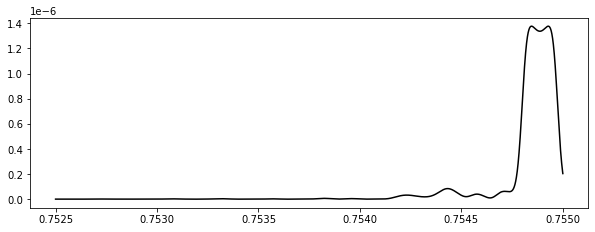

In [7]:
[1] 

lc_count_rate_f = sig.lombscargle(dt, lc_count_rate,w)

plt.figure(figsize = [10,3.5])
plt.plot(w, lc_count_rate_f, c = 'k')
#plt.errorbar(dt, lc_count_rate, lc_count_rate_err, fmt = 'none', c = 'pink')
#plt.xlim(0.7545,0.7550)